# Setup

In [1]:
library(popsom)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
source('/home/ec2-user/SageMaker/popsom/R/map-utils.R')

Loading required package: som
Loading required package: class
Loading required package: fields
Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.5-1 (2019-12-12) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps
See https://github.com/NCAR/Fields for
 an extensive vignette, other supplements and source code 


In [3]:
# a function that searches for the best model

library(popsom)

train.maps <- function(dataset, labels, xsize, ysize) {

    num_train <- c()
    convergs <- c()

    best_map <- NULL
    best_converg = 0
    best_train = 0
    best_timr = 0

    # find the best map
    for(i in seq(1,5))
    {
      for(i in list(10,100,1000,10000,50000,100000,200000,400000))
      {
        start_time = Sys.time()
        ms = map.build(dataset, 
                       labels = labels, 
                       xdim = xsize, 
                       ydim = ysize, 
                       alpha=0.6,
                       train = i,
                       algorithm="vsom")
        end_time = Sys.time()
        delta_time = end_time - start_time

        converg = map.convergence(ms)
        num_train = c(num_train,i)
        convergs = c(convergs,converg)
        #print(converg)
      
        if (converg > best_converg) {
            best_map = ms
            best_converg = converg
            best_train = i
            best_time = delta_time
        }
      }
    }

    # gather convergence data
    conv_data <- data.frame(num_train,convergs)
        
    list(data=conv_data, 
         map=best_map, 
         conv=best_converg, 
         train=best_train,
         time=best_time)
}

In [4]:
# plot convergence accuracy based on convergence data
library(ggplot2)

plot.convergence <- function (plot_data, name) {
    ggplot(plot_data,aes(x = log2(num_train), y = convergs)) +
        geom_point() +
        ylim(0,1)  +
        labs(title = paste(name,'Convergence Accuracy'),x= 'log2(Iterations)', y = 'Value') +
        stat_smooth(method = lm, formula = y ~ poly(x, 3)) +
        theme_bw() + theme(plot.title = element_text(hjust = 0.5))
}

In [5]:
# compute the number of clusters found on the map

n.clusters <- function(map) {
    
    heat <- compute.umat(results$map)
    centroids <- compute.centroids(map,heat)
    unique.centroids <- get.unique.centroids(map, centroids)
    length(unique.centroids$position.x)
}


# SOM with original data

In [6]:
data_label <- read.csv('dataset/dim064_test_label.csv')
data <- read.csv('dataset/dim064_test.csv')

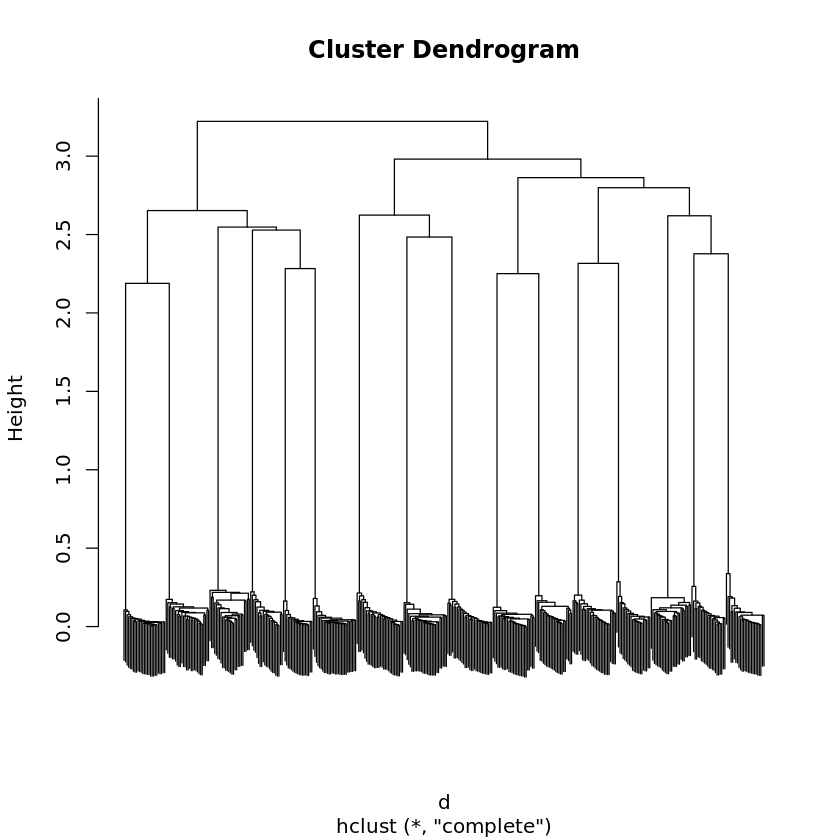

In [7]:
d <- dist(as.matrix(data))   # find distance matrix 
hc <- hclust(d)                # apply hirarchical clustering 
plot(hc, labels=FALSE)

In [8]:
results = train.maps(data,data_label,20,15)

In [9]:
results$time

Time difference of 5.522549 secs

In [10]:
n.clusters(results$map)

[1] 15

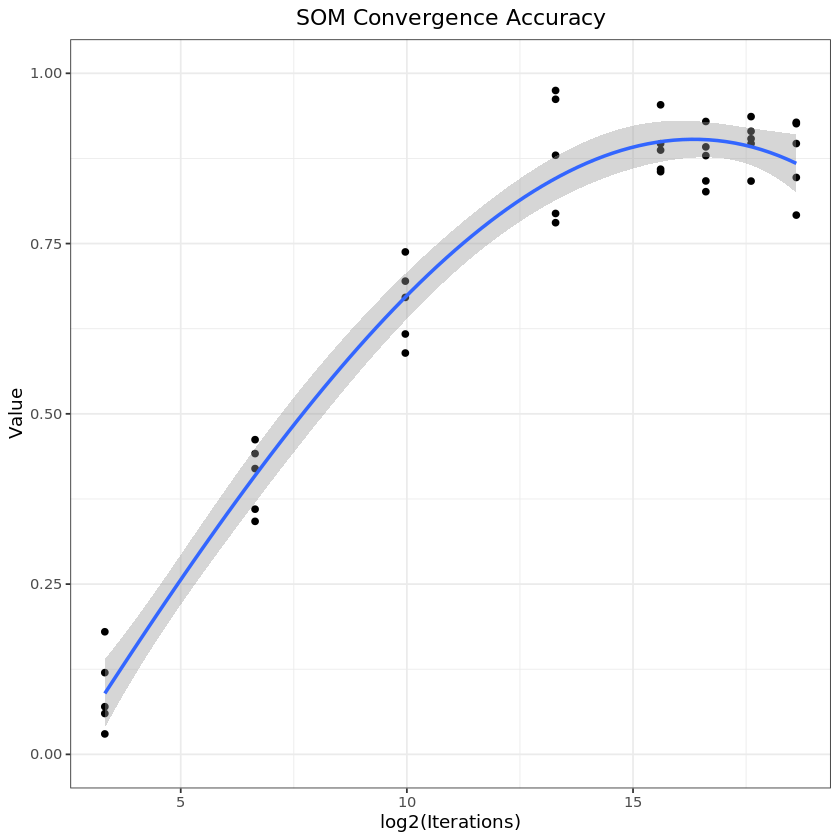

In [11]:
plot.convergence(results$data, 'SOM')

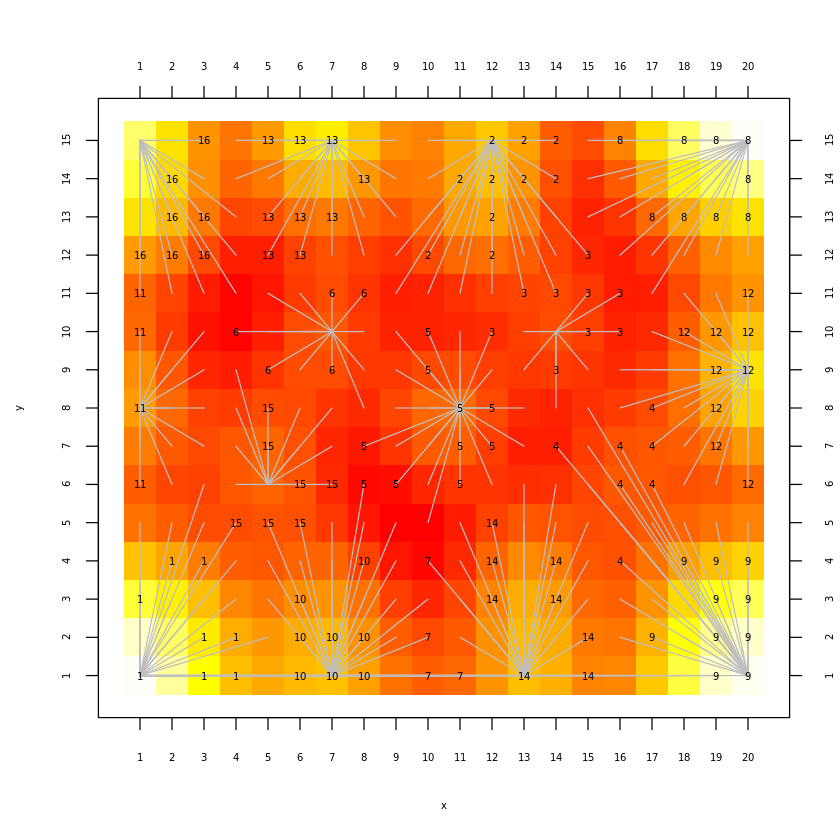

In [12]:
map.starburst(results$map)

# Basic Autoencoder

In [13]:
data_label <- read.csv('dataset/dim064_test_label.csv')
data <- read.csv('output/dim064_AE_encoded.csv')

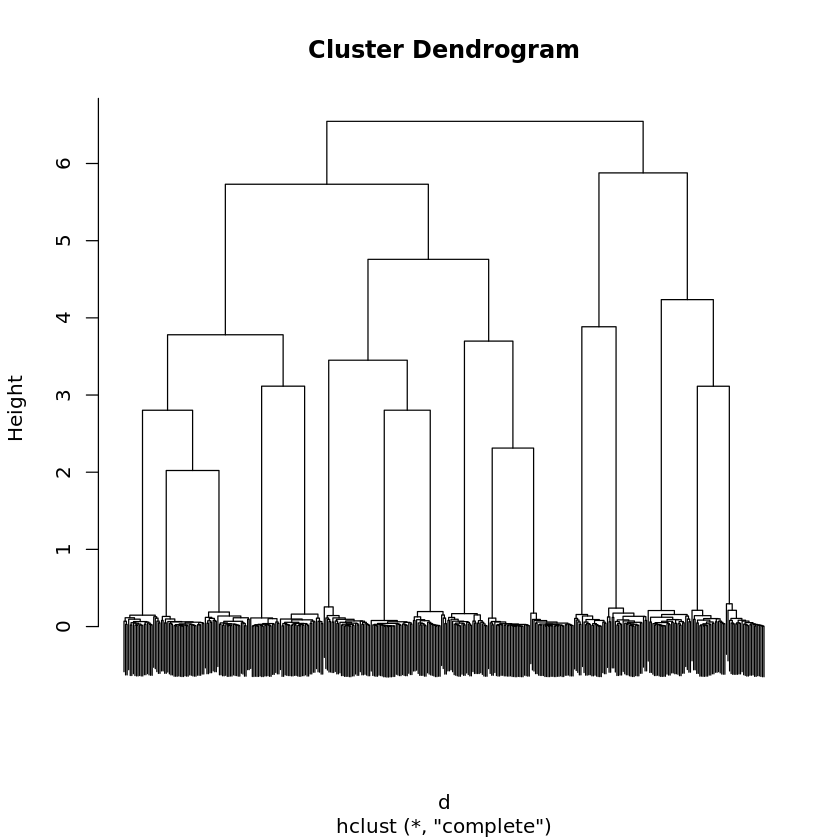

In [14]:
d <- dist(as.matrix(data))   # find distance matrix 
hc <- hclust(d)                # apply hirarchical clustering 
plot(hc, labels=FALSE)

In [15]:
results = train.maps(data,data_label,20,15)

In [16]:
results$time

Time difference of 2.11474 secs

In [17]:
results$train

[1] 4e+05

In [18]:
n.clusters(results$map)

[1] 14

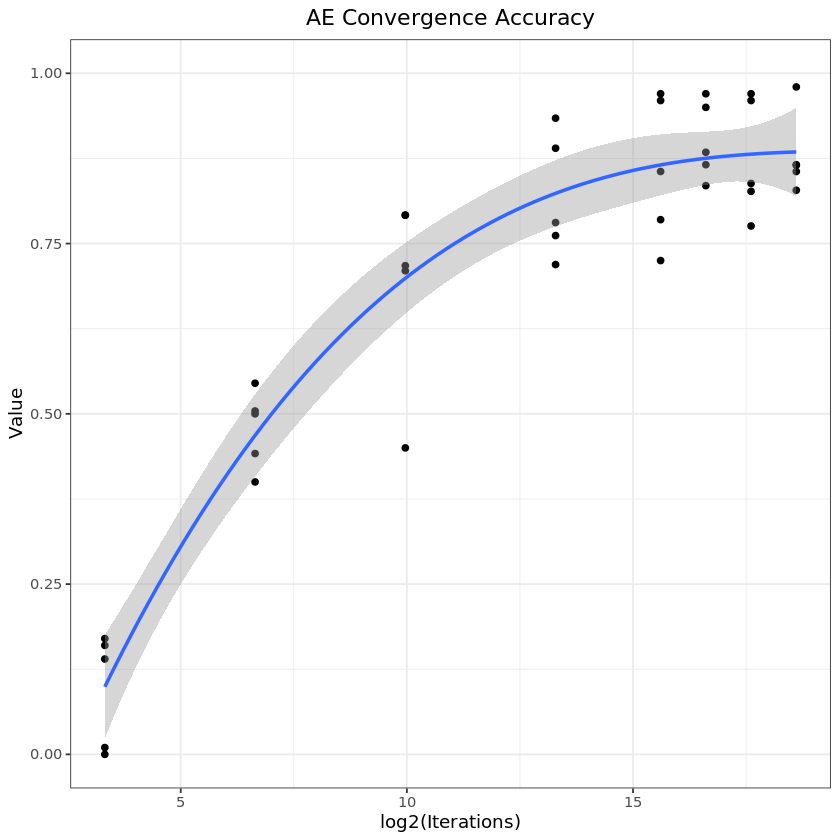

In [19]:
plot.convergence(results$data, 'AE')

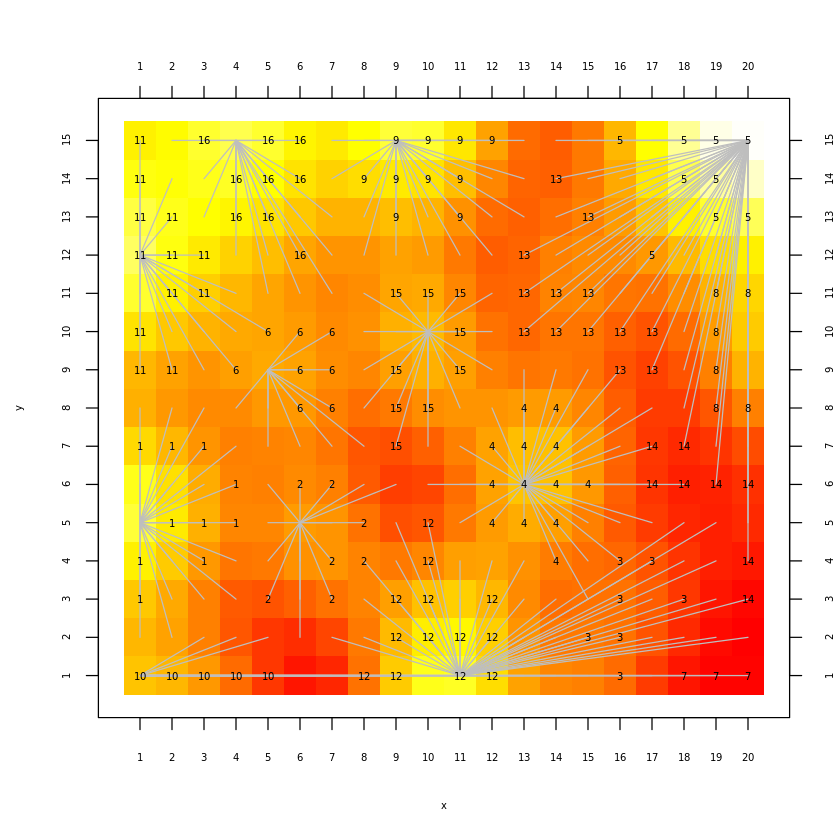

In [20]:
map.starburst(results$map)

# Sparse Autoencoder

In [21]:
data_label <- read.csv('dataset/dim064_test_label.csv')
data <- read.csv('output/dim064_SAE_encoded.csv')

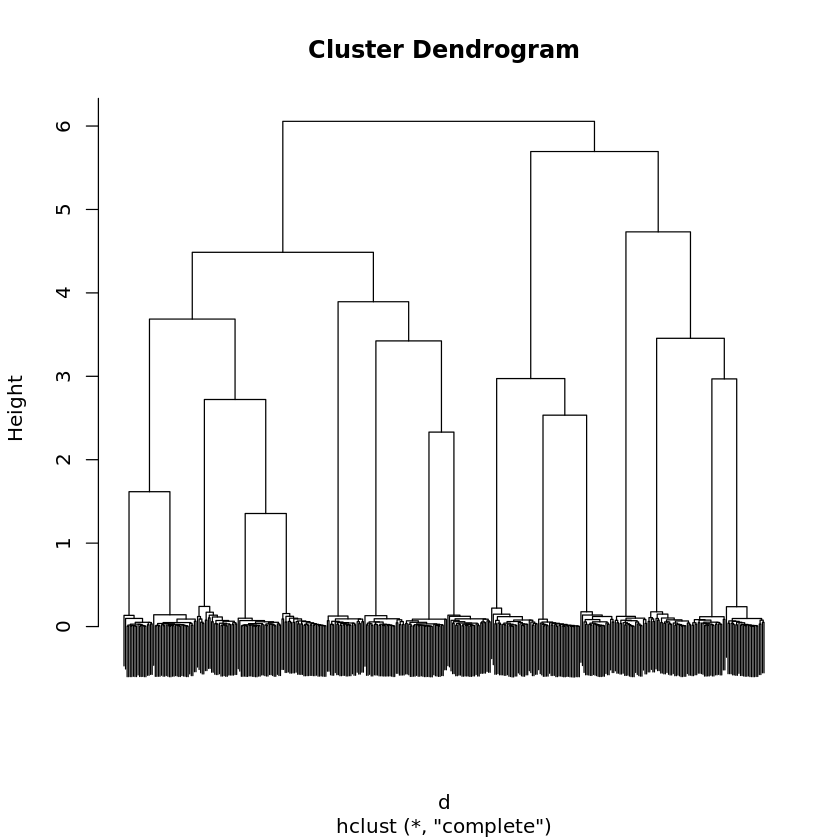

In [22]:
d <- dist(as.matrix(data))   # find distance matrix 
hc <- hclust(d)                # apply hirarchical clustering 
plot(hc, labels=FALSE)

In [23]:
results = train.maps(data,data_label,20,15)

In [24]:
results$time

Time difference of 2.128272 secs

In [25]:
results$train

[1] 4e+05

In [26]:
n.clusters(results$map)

[1] 15

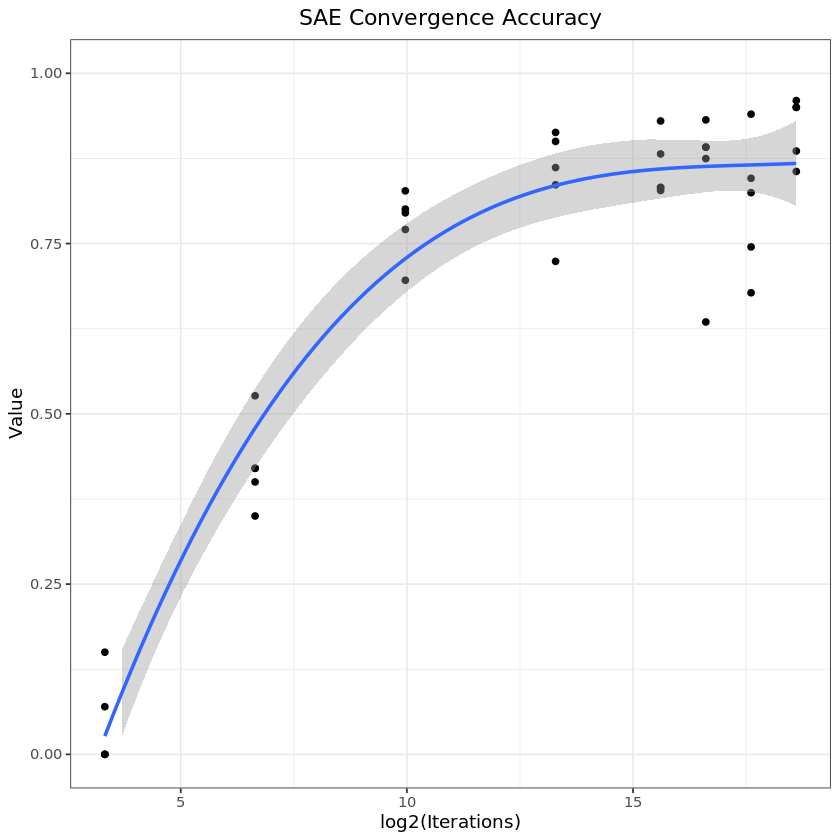

In [27]:
plot.convergence(results$data, 'SAE')

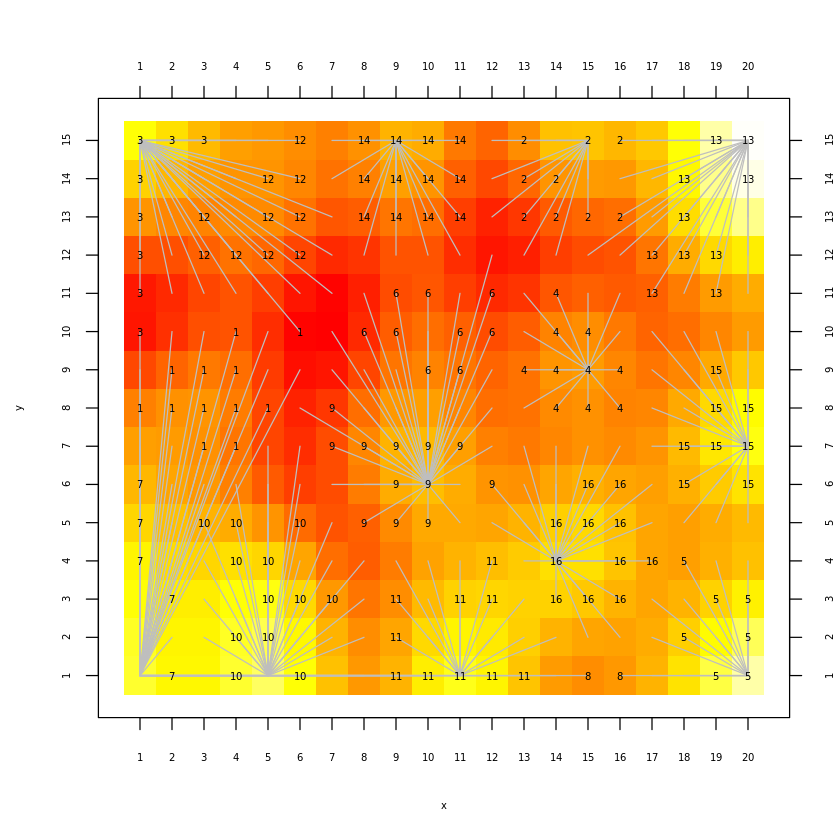

In [28]:
map.starburst(results$map)

# Contractive Autoencode

In [29]:
data_label <- read.csv('dataset/dim064_test_label.csv')
data <- read.csv('output/dim064_CAE_encoded.csv')

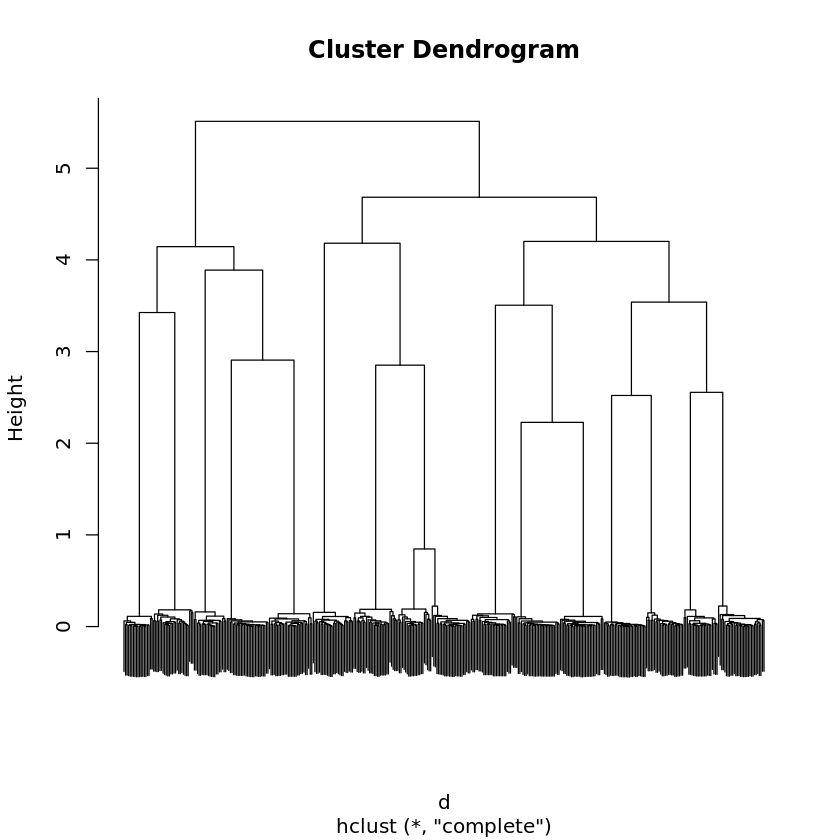

In [30]:
d <- dist(as.matrix(data))   # find distance matrix 
hc <- hclust(d)                # apply hirarchical clustering 
plot(hc, labels=FALSE)

In [31]:
results = train.maps(data,data_label,20,15)

In [32]:
results$time

Time difference of 1.320233 secs

In [33]:
results$train

[1] 1e+05

In [34]:
n.clusters(results$map)

[1] 16

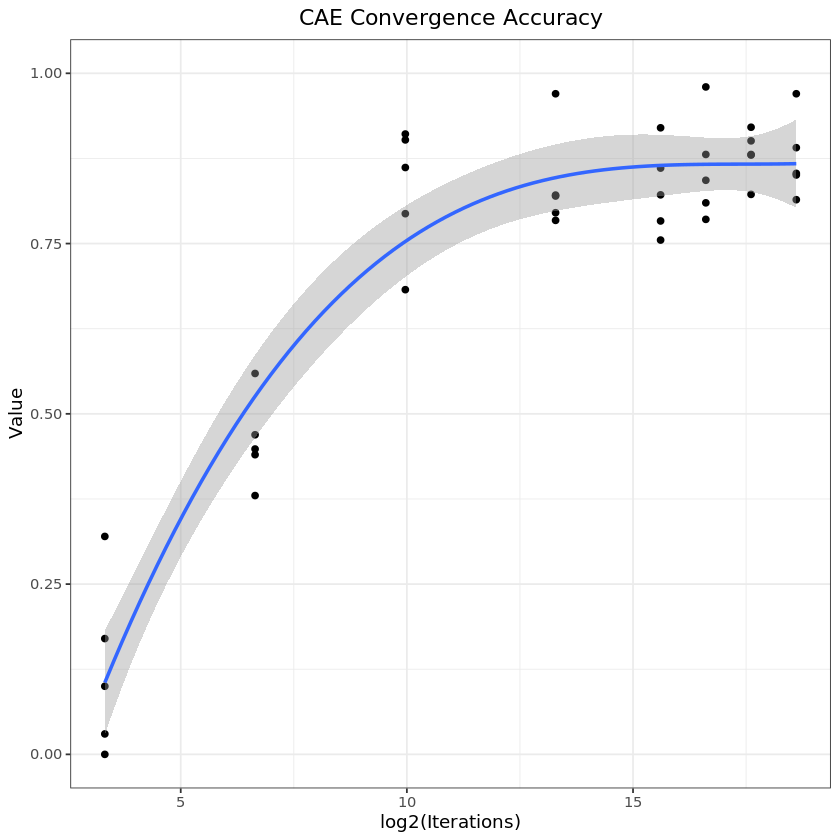

In [35]:
plot.convergence(results$data, 'CAE')

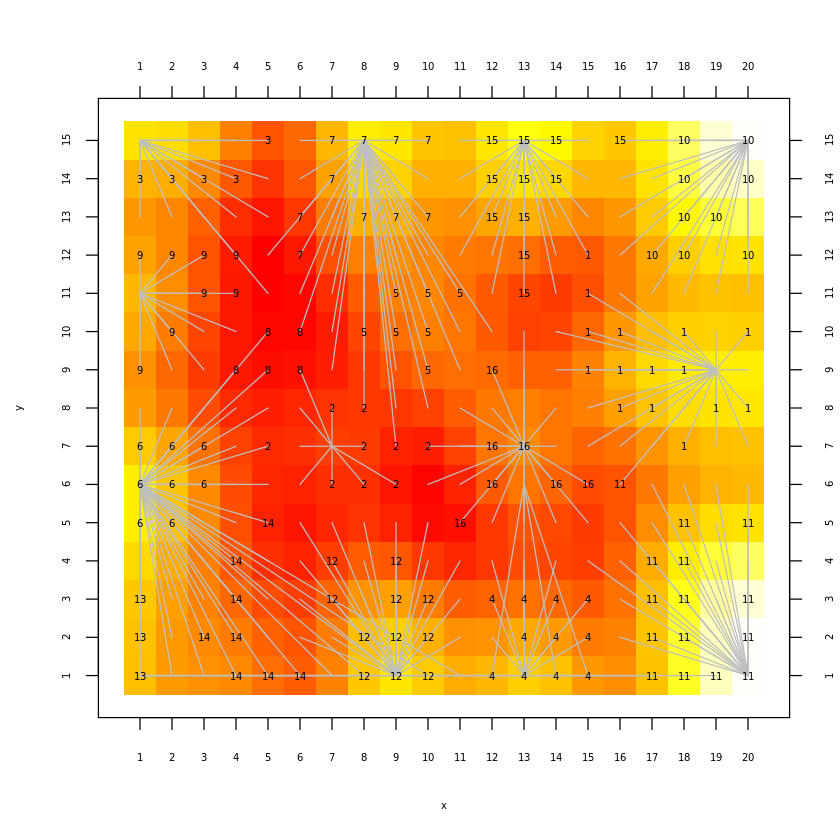

In [36]:
map.starburst(results$map)

# Denoising Autoencoder

In [37]:
data_label <- read.csv('dataset/dim064_test_label.csv')
data <- read.csv('output/dim064_DAE_encoded.csv')

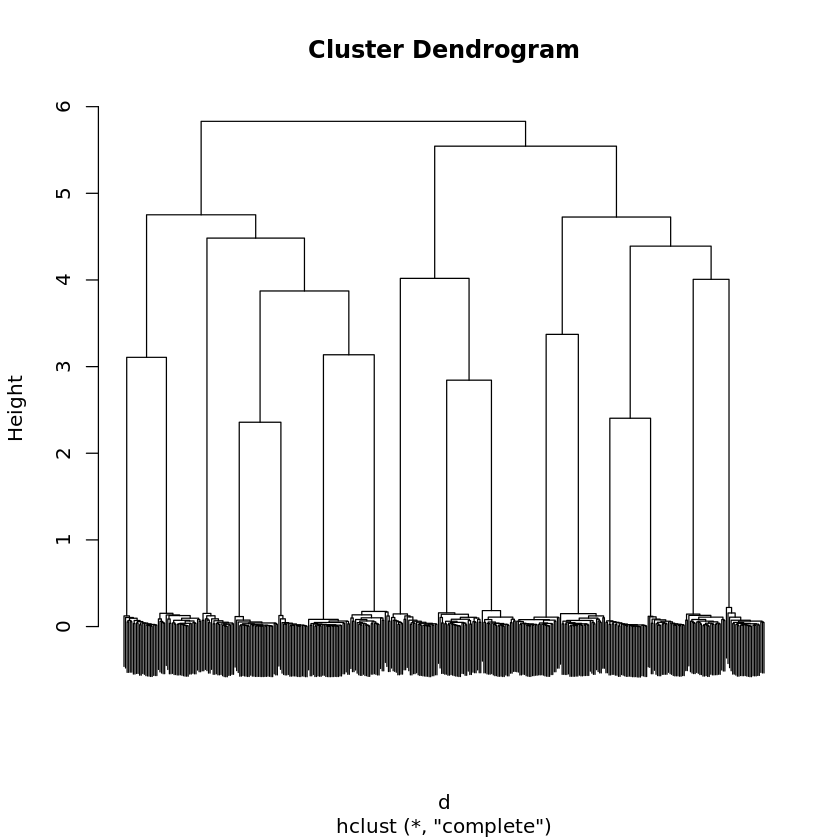

In [38]:
d <- dist(as.matrix(data))   # find distance matrix 
hc <- hclust(d)                # apply hirarchical clustering 
plot(hc, labels=FALSE)

In [39]:
results = train.maps(data,data_label,20,15)

In [40]:
results$time

Time difference of 2.323337 secs

In [41]:
results$train

[1] 2e+05

In [42]:
n.clusters(results$map)

[1] 17

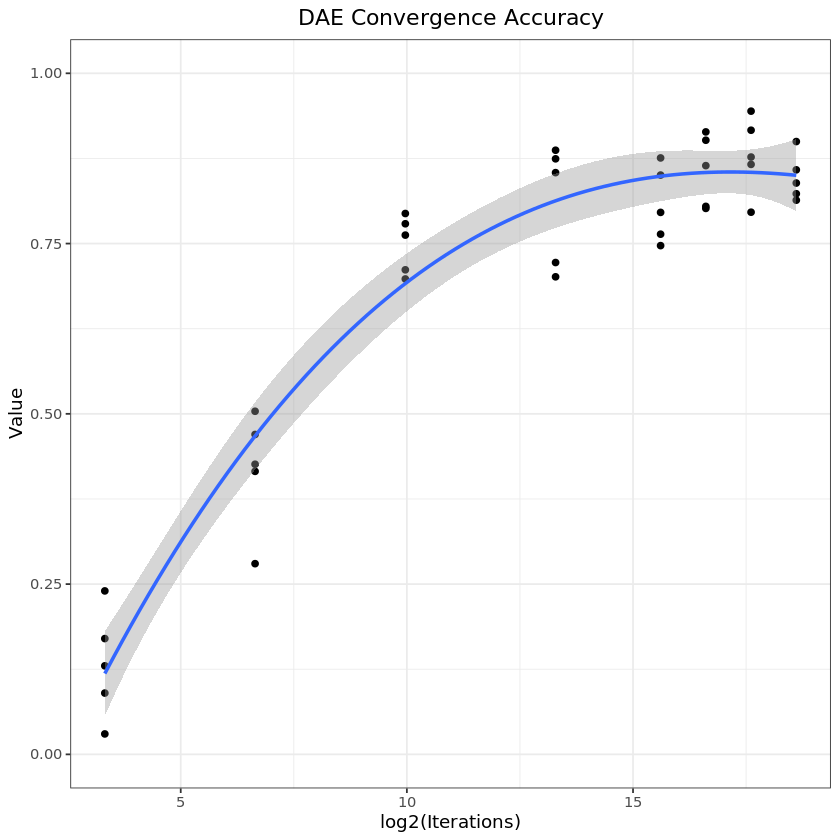

In [43]:
plot.convergence(results$data, 'DAE')

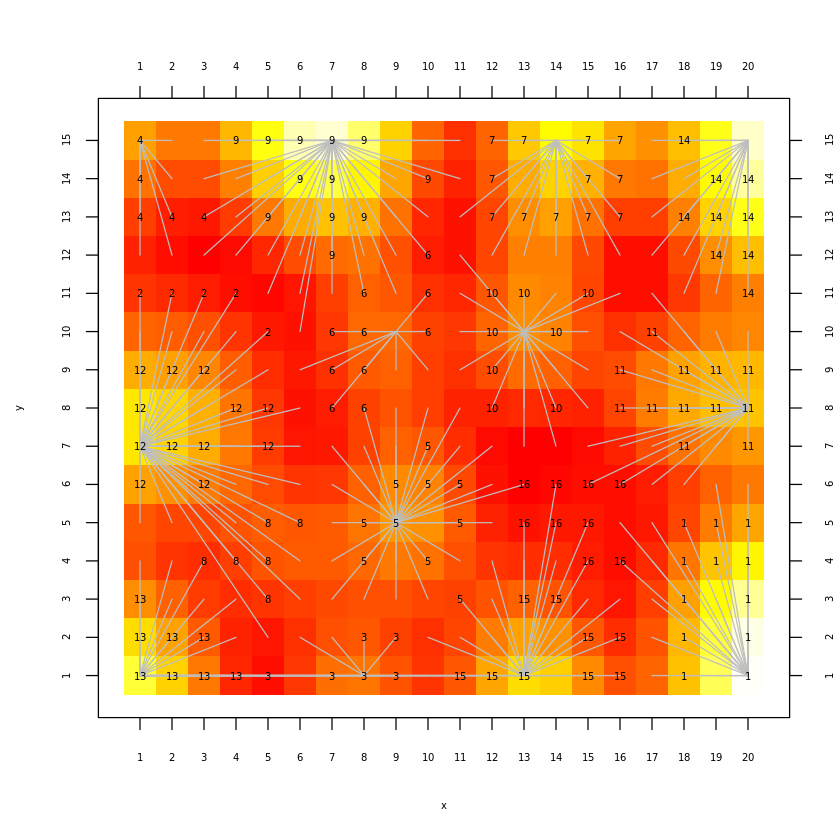

In [44]:
map.starburst(results$map)

# Convolutional Autoencoder

In [45]:
data_label <- read.csv('dataset/dim064_test_label.csv')
data <- read.csv('output/dim064_ConAE_encoded.csv')

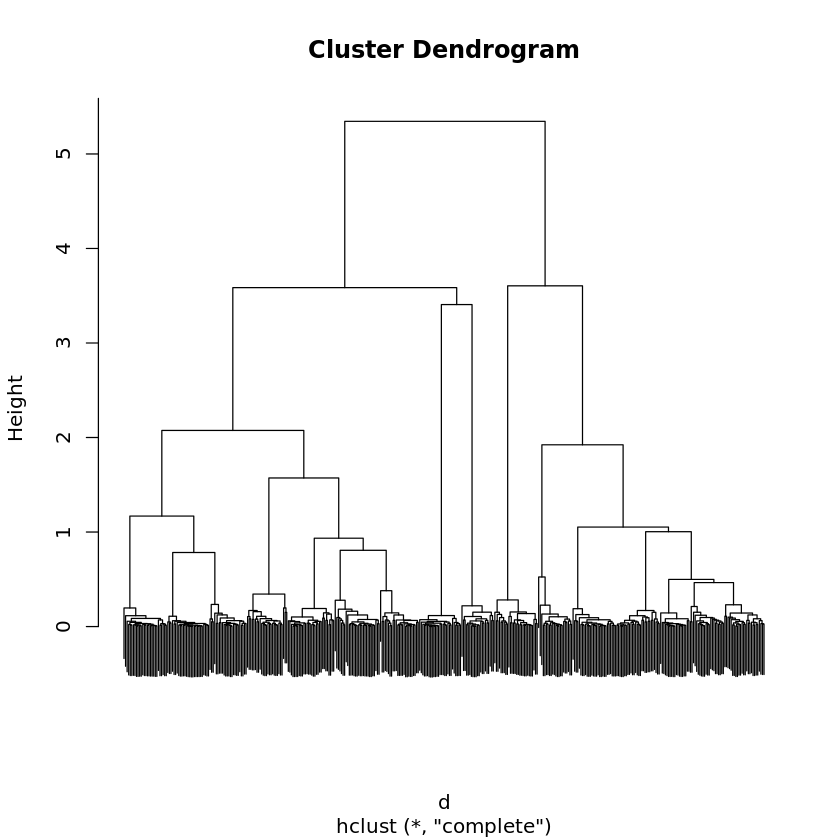

In [46]:
d <- dist(as.matrix(data))   # find distance matrix 
hc <- hclust(d)                # apply hirarchical clustering 
plot(hc, labels=FALSE)

In [47]:
results = train.maps(data,data_label,20,15)

In [48]:
results$time

Time difference of 0.7480683 secs

In [49]:
results$train

[1] 10000

In [50]:
n.clusters(results$map)

[1] 17

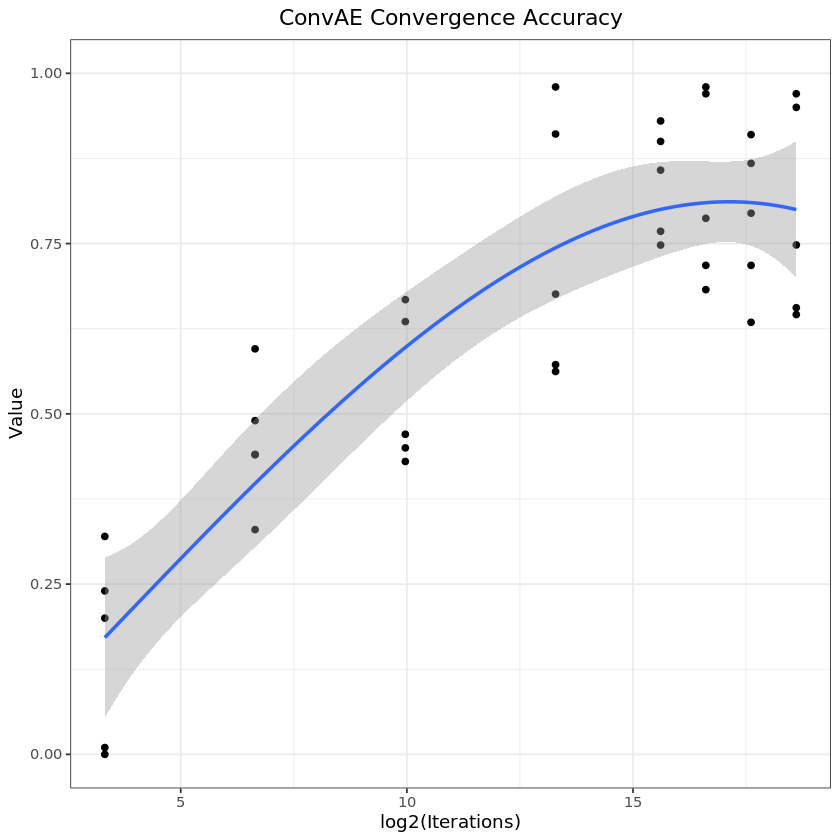

In [51]:
plot.convergence(results$data, 'ConvAE')

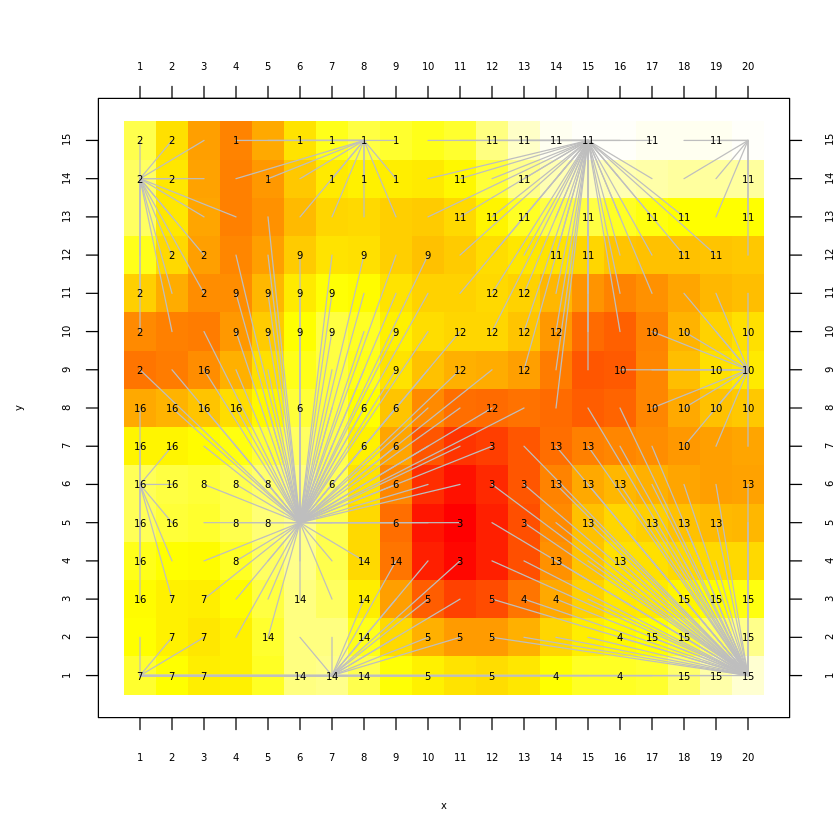

In [52]:
map.starburst(results$map)